In [99]:
data1['IssueDate']= pd.to_datetime(data1['IssueDate'])
(data1.dtypes)

UserID                      int64
IssueDate          datetime64[ns]
TotalChargeable           float64
dtype: object

In [100]:

# Create snapshot date
snapshot_date = pd.to_datetime('2021-02-04', format='%Y-%m-%d', errors='ignore')
print(snapshot_date)
# Grouping by UserID
data2 = data1.groupby(['UserID']).agg({
        'IssueDate': lambda x: (snapshot_date - x.max()).days,
        'UserID': 'count',
        'TotalChargeable': 'sum'})
# Rename the columns 
data2.rename(columns={'IssueDate': 'Recency',
                         'UserID': 'Frequency',
                         'TotalChargeable': 'Monetary'}, inplace=True)
                         
    
data2

2021-02-04 00:00:00


,Recency,Frequency,Monetary
UserID,,,
2045,21,2,14930600.0
2132,44,4,43829800.5
2360,53,1,2006500.0
2420,29,1,3579800.0
2540,100,1,8158400.0
...,...,...,...
1180977,5,1,1261500.0
1180995,5,1,12528200.0
1180998,5,1,1526000.0


In [101]:
data2 = data2.reset_index()
data2

,UserID,Recency,Frequency,Monetary
0,2045,21,2,14930600.0
1,2132,44,4,43829800.5
2,2360,53,1,2006500.0
3,2420,29,1,3579800.0
4,2540,100,1,8158400.0
...,...,...,...,...
9202,1180977,5,1,1261500.0
9203,1180995,5,1,12528200.0
9204,1180998,5,1,1526000.0
9205,1181000,5,1,2902100.0


In [11]:
data2.to_excel (r'C:\Users\bahare\Desktop\Data Analyst\Tasks\b.xlsx', index = False, header=True)

In [102]:
data2["UserID"] = data2["UserID"].astype(str)
(data2.dtypes)

UserID        object
Recency        int64
Frequency      int64
Monetary     float64
dtype: object

In [103]:
data2

,UserID,Recency,Frequency,Monetary
0,2045,21,2,14930600.0
1,2132,44,4,43829800.5
2,2360,53,1,2006500.0
3,2420,29,1,3579800.0
4,2540,100,1,8158400.0
...,...,...,...,...
9202,1180977,5,1,1261500.0
9203,1180995,5,1,12528200.0
9204,1180998,5,1,1526000.0
9205,1181000,5,1,2902100.0


In [104]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime
import datetime as dt
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from sklearn.cluster import KMeans
import sqlite3
from datetime import datetime, timedelta

In [105]:
q_1 = 0.225
q_2 = 0.45
q_3 = 0.675
q_4 = 0.9
q_5 = 1

quartiles = data2.quantile(q=[q_1,q_2,q_3,q_4,q_5])
print(quartiles, type(quartiles))
quartiles=quartiles.to_dict()
quartiles


def MClass(x,p,d):
    if x <= d[p][q_1]:
        return 1
    elif x <= d[p][q_2]:
        return 2
    elif x <= d[p][q_3]: 
        return 3
    elif x <= d[p][q_4]:
        return 4
    else:
        return 5  
  

rfmSeg = data2
rfmSeg['M_Quartile'] = rfmSeg['Monetary'].apply(MClass, args=('Monetary',quartiles,))

rfmSeg

       Recency  Frequency     Monetary
0.225     24.0        1.0    3900105.0
0.450     51.0        1.0    7654480.0
0.675     80.0        1.0   13074160.0
0.900    121.0        3.0   30362800.0
1.000    135.0       41.0  384955240.0 <class 'pandas.core.frame.DataFrame'>


,UserID,Recency,Frequency,Monetary,M_Quartile
0,2045,21,2,14930600.0,4
1,2132,44,4,43829800.5,5
2,2360,53,1,2006500.0,1
3,2420,29,1,3579800.0,1
4,2540,100,1,8158400.0,3
...,...,...,...,...,...
9202,1180977,5,1,1261500.0,1
9203,1180995,5,1,12528200.0,3
9204,1180998,5,1,1526000.0,1
9205,1181000,5,1,2902100.0,1


In [108]:
q_1 = 0.2
q_2 = 0.4
q_3 = 0.6
q_4 = 0.8
q_5 = 1

quartiles = rfmSeg.quantile(q=[q_1,q_2,q_3,q_4,q_5])
print(quartiles, type(quartiles))
quartiles=quartiles.to_dict()
quartiles


def RClass(x,p,d):
    if x <= d[p][q_1]:
        return 5
    elif x <= d[p][q_2]:
        return 4
    elif x <= d[p][q_3]: 
        return 3
    elif x <= d[p][q_4]:
        return 2
    else:
        return 1  
    
    
rfmSeg1 = rfmSeg
rfmSeg1['R_Quartile'] = rfmSeg1['Recency'].apply(RClass, args=('Recency',quartiles,))

rfmSeg1

 

     Recency  Frequency     Monetary  M_Quartile
0.2     22.0        1.0    3512920.0         1.0
0.4     45.0        1.0    6900000.0         2.0
0.6     69.0        1.0   10745440.0         3.0
0.8    101.0        2.0   19167360.0         4.0
1.0    135.0       41.0  384955240.0         5.0 <class 'pandas.core.frame.DataFrame'>


,UserID,Recency,Frequency,Monetary,M_Quartile,R_Quartile
0,2045,21,2,14930600.0,4,5
1,2132,44,4,43829800.5,5,4
2,2360,53,1,2006500.0,1,3
3,2420,29,1,3579800.0,1,4
4,2540,100,1,8158400.0,3,2
...,...,...,...,...,...,...
9202,1180977,5,1,1261500.0,1,5
9203,1180995,5,1,12528200.0,3,5
9204,1180998,5,1,1526000.0,1,5
9205,1181000,5,1,2902100.0,1,5


In [109]:
q_1 = 0.68
q_2 = 0.88
q_3 = 0.935
q_4 = 0.971
q_5 = 1

quartiles = rfmSeg1.quantile(q=[q_1,q_2,q_3,q_4,q_5])
print(quartiles, type(quartiles))
quartiles=quartiles.to_dict()
quartiles


def FClass(x,p,d):
    if x <= d[p][q_1]:
        return 1
    elif x <= d[p][q_2]:
        return 2
    elif x <= d[p][q_3]: 
        return 3
    elif x <= d[p][q_4]:
        return 4
    else:
        return 5  
    
    
rfmSeg2 = rfmSeg1
rfmSeg2['F_Quartile'] = rfmSeg2['Frequency'].apply(FClass, args=('Frequency',quartiles,))

rfmSeg2

 

       Recency  Frequency      Monetary  M_Quartile  R_Quartile
0.680     81.0        1.0  1.320172e+07         4.0         4.0
0.880    118.0        2.0  2.753760e+07         4.0         5.0
0.935    126.0        3.0  3.759330e+07         5.0         5.0
0.971    131.0        5.0  5.976045e+07         5.0         5.0
1.000    135.0       41.0  3.849552e+08         5.0         5.0 <class 'pandas.core.frame.DataFrame'>


,UserID,Recency,Frequency,Monetary,M_Quartile,R_Quartile,F_Quartile
0,2045,21,2,14930600.0,4,5,2
1,2132,44,4,43829800.5,5,4,4
2,2360,53,1,2006500.0,1,3,1
3,2420,29,1,3579800.0,1,4,1
4,2540,100,1,8158400.0,3,2,1
...,...,...,...,...,...,...,...
9202,1180977,5,1,1261500.0,1,5,1
9203,1180995,5,1,12528200.0,3,5,1
9204,1180998,5,1,1526000.0,1,5,1
9205,1181000,5,1,2902100.0,1,5,1


In [111]:
rfmSeg2['RFMClass'] = rfmSeg1.R_Quartile.map(str) \
                            + rfmSeg2.F_Quartile.map(str) \
                            + rfmSeg.M_Quartile.map(str)


rfmSeg2.head()

,UserID,Recency,Frequency,Monetary,M_Quartile,R_Quartile,F_Quartile,RFMClass
0,2045,21,2,14930600.0,4,5,2,524
1,2132,44,4,43829800.5,5,4,4,445
2,2360,53,1,2006500.0,1,3,1,311
3,2420,29,1,3579800.0,1,4,1,411
4,2540,100,1,8158400.0,3,2,1,213


In [27]:
rfmSeg2.to_excel (r'C:\Users\bahare\Desktop\Data Analyst\Tasks\lalay lalay.xlsx', index = False, header=True)

In [112]:
rfmSeg2['RFMClass2'] = rfmSeg1.R_Quartile + rfmSeg2.F_Quartile + rfmSeg.M_Quartile

rfmSeg2.head()

,UserID,Recency,Frequency,Monetary,M_Quartile,R_Quartile,F_Quartile,RFMClass,RFMClass2
0,2045,21,2,14930600.0,4,5,2,524,11
1,2132,44,4,43829800.5,5,4,4,445,13
2,2360,53,1,2006500.0,1,3,1,311,5
3,2420,29,1,3579800.0,1,4,1,411,6
4,2540,100,1,8158400.0,3,2,1,213,6


In [30]:
rfmSeg2.sort_values(by=['RFMClass', 'Monetary'], ascending=[False, False])

,UserID,Recency,Frequency,Monetary,M_Quartile,R_Quartile,F_Quartile,RFMClass,RFMClass2
1872,538528,10,13,384955240.0,5,5,5,555,15
71,17163,6,14,294107807.6,5,5,5,555,15
2711,726816,11,15,229130100.0,5,5,5,555,15
5272,1093297,7,6,189592397.0,5,5,5,555,15
2398,650287,20,13,177601950.0,5,5,5,555,15
...,...,...,...,...,...,...,...,...,...
4967,1086831,123,1,590543.0,1,1,1,111,3
461,142208,103,1,573900.0,1,1,1,111,3
2275,624799,126,1,503706.0,1,1,1,111,3
4513,1081037,132,1,500000.0,1,1,1,111,3


C:\Users\bahare\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bahare\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bahare\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

IndexError: index 4 is out of bounds for axis 0 with size 4

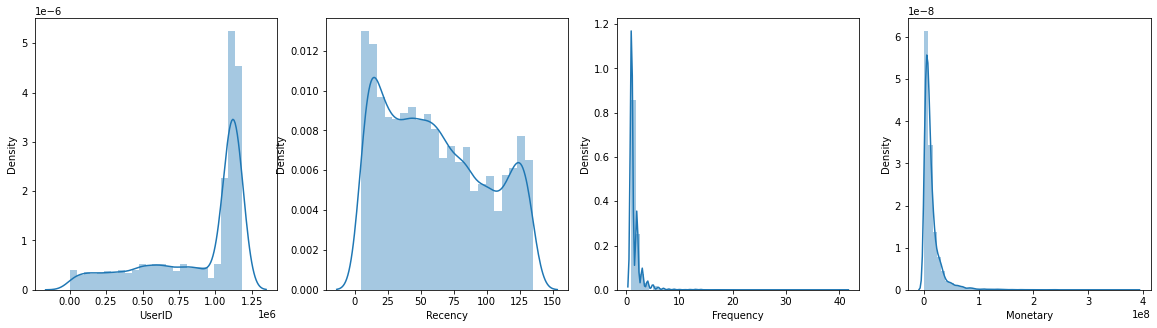

In [46]:
fig, axes = plt.subplots(1,4,figsize=(20,5))
for i, feature in enumerate(list(rfmSeg2.columns)):
    sns.distplot(rfmSeg2[feature], ax=axes[i])

In [131]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 11, max_iter = 300, random_state = 50 )
kmeans.fit(X)

KMeans(n_clusters=11, random_state=50)

In [85]:
#distortions = []
#K = range(1,10)
#for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(rfmSeg2)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

IndentationError: unexpected indent (<ipython-input-85-0447403a6923>, line 4)

In [132]:
rfmSeg2.loc[rfmSeg2.M_Quartile == 4, 'RFMSegment'] = "Blue Whales"
rfmSeg2.loc[rfmSeg2.M_Quartile == 3, 'RFMSegment'] = "Whales"
rfmSeg2.loc[rfmSeg2.R_Quartile == 4, 'RFMSegment'] = "Most Loyal Customers"
rfmSeg2.loc[rfmSeg2.R_Quartile == 3, 'RFMSegment'] = "Relatively Loyal Customers"
rfmSeg2.loc[rfmSeg2.RFMClass == "233", 'RFMSegment'] = "Almost Lost"
rfmSeg2.loc[rfmSeg2.RFMClass == "133", 'RFMSegment'] = "Lost Customers"
rfmSeg2.loc[rfmSeg2.RFMClass == "444", 'RFMSegment'] = "Best Customers"
rfmSeg2.loc[rfmSeg2.RFMClass == "111", 'RFMSegment'] = "Lost Cheap Customers"
rfmSeg2 = rfmSeg2.fillna("Other")

rfmSeg2

,UserID,Recency,Frequency,Monetary,M_Quartile,R_Quartile,F_Quartile,RFMClass,RFMClass2,RFMSegment,RFMSegment2
0,2045,21,2,14930600.0,4,5,2,524,11,Blue Whales,High Value
1,2132,44,4,43829800.5,5,4,4,445,13,Most Loyal Customers,High Value
2,2360,53,1,2006500.0,1,3,1,311,5,Relatively Loyal Customers,Low Value
3,2420,29,1,3579800.0,1,4,1,411,6,Most Loyal Customers,Low Value
4,2540,100,1,8158400.0,3,2,1,213,6,Whales,Low Value
...,...,...,...,...,...,...,...,...,...,...,...
9202,1180977,5,1,1261500.0,1,5,1,511,7,Other,Other
9203,1180995,5,1,12528200.0,3,5,1,513,9,Whales,Other
9204,1180998,5,1,1526000.0,1,5,1,511,7,Other,Other
9205,1181000,5,1,2902100.0,1,5,1,511,7,Other,Other


In [128]:
#rfmSeg2.loc[rfmSeg2.RFMClass2 >= 10, 'RFMSegment2'] = "High Value"
#rfmSeg2.loc[rfmSeg2.RFMClass2 <= 6 , 'RFMSegment2'] = "Low Value"
#rfmSeg = rfmSeg2.fillna("Mid Value")

#rfmSeg2

In [155]:

rfmSeg_level_agg = rfmSeg2.groupby(['RFMSegment', 'RFMClass']).agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count','std']
}).round(1)

#the aggregated dataset
data9 = rfmSeg_level_agg
data9

Recency Frequency    Monetary                 
                           mean      mean        mean count        std
RFMSegment     RFMClass                                               
Almost Lost    233         83.7       3.0  10911254.3    18  1431595.4
Best Customers 444         33.5       4.3  19042341.8    33  4073273.9
Blue Whales    114        118.6       1.0  18966770.4   356  4901381.0
               124        118.5       2.0  20459018.6   107  5060211.0
               134        115.9       3.0  21073869.0    26  4971767.8
...                         ...       ...         ...   ...        ...
Whales         513         14.1       1.0   9912912.9   118  1490214.8
               523         13.0       2.0   9916921.4   110  1508620.8
               533         12.3       3.0  10580924.6    39  1516871.7
               543         12.6       4.2  10376021.0    23  1646480.8
               553          5.0       6.0  12160400.0     1        NaN

[101 rows x 5 columns]

In [156]:
data10 = data9.reset_index()
data9

Recency Frequency    Monetary                 
                           mean      mean        mean count        std
RFMSegment     RFMClass                                               
Almost Lost    233         83.7       3.0  10911254.3    18  1431595.4
Best Customers 444         33.5       4.3  19042341.8    33  4073273.9
Blue Whales    114        118.6       1.0  18966770.4   356  4901381.0
               124        118.5       2.0  20459018.6   107  5060211.0
               134        115.9       3.0  21073869.0    26  4971767.8
...                         ...       ...         ...   ...        ...
Whales         513         14.1       1.0   9912912.9   118  1490214.8
               523         13.0       2.0   9916921.4   110  1508620.8
               533         12.3       3.0  10580924.6    39  1516871.7
               543         12.6       4.2  10376021.0    23  1646480.8
               553          5.0       6.0  12160400.0     1        NaN

[101 rows x 5 columns]

In [157]:
data10.to_excel (r'C:\Users\bahare\Desktop\Data Analyst\Tasks\1.xlsx', index = True, header=True)

In [124]:
rfmSeg2['RFMSegment']

0                      Blue Whales
1             Most Loyal Customers
2       Relatively Loyal Customers
3             Most Loyal Customers
4                           Whales
                   ...            
9202                         Other
9203                        Whales
9204                         Other
9205                         Other
9206                         Other
Name: RFMSegment, Length: 9207, dtype: object